In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
sns.set()

/home/jhallbe/anaconda3/envs/waldo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jhallbe/anaconda3/envs/waldo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jhallbe/anaconda3/envs/waldo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jhallbe/anaconda3/envs/waldo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jhallbe/anaconda3/envs/waldo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(

# Load Data

In [2]:
def load_data(data_location):
    return pd.read_csv(data_location)

In [3]:
data_location = "data/denver_data.csv"
df = load_data(data_location)

# Normalize Data

In [5]:
def min_max_normalization(df):
    return (df - df.min()) / (df.max() - df.min())

In [7]:
from sklearn.preprocessing import LabelEncoder
y_df = df['weather_description_Denver']
X_df = df.drop('weather_description_Denver', axis=1)


In [8]:
le = LabelEncoder()
le.fit(y_df)
y_df = le.transform(y_df)
pd.DataFrame(y_df).values

array([[11],
       [ 0],
       [ 0],
       ...,
       [23],
       [ 5],
       [23]])

In [9]:
normalized_X_df = min_max_normalization(X_df)
normalized_X_df.describe()

,humidity_Denver,pressure_Denver,temperature_Denver,wind_direction_Denver,wind_speed_Denver
count,43209.000000,43209.000000,43209.000000,43209.000000,43209.000000
mean,0.505507,0.733067,0.532536,0.515345,0.112855
std,0.251536,0.145425,0.162750,0.289128,0.097900
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.294737,0.740484,0.415001,0.277778,0.045455
50%,0.494737,0.761246,0.535051,0.558333,0.090909
75%,0.715789,0.778547,0.651936,0.741667,0.136364
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualize Data

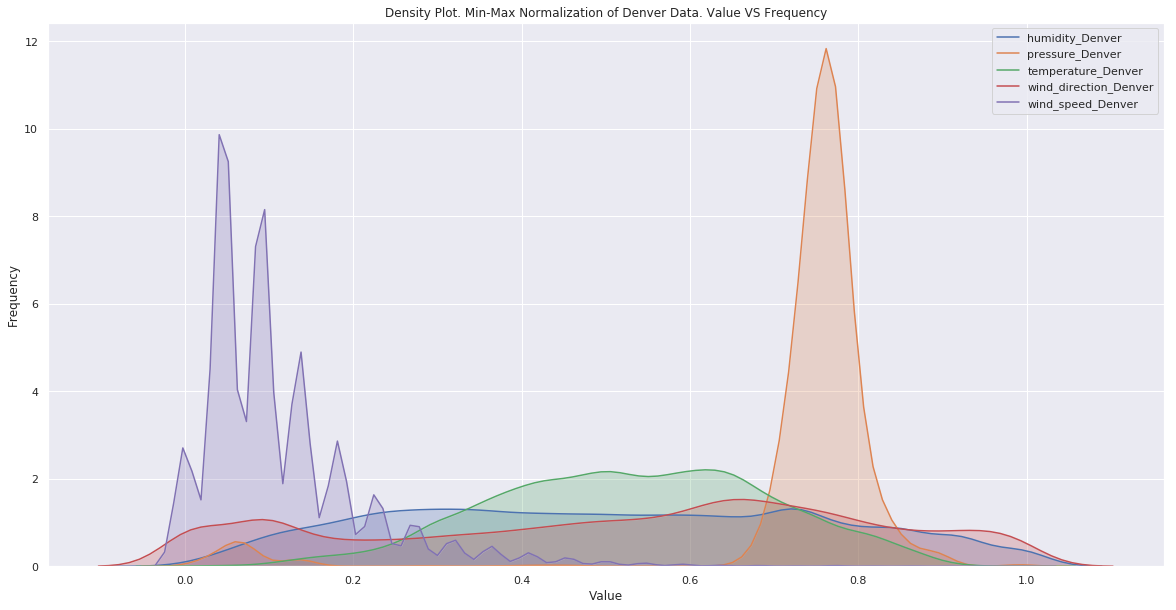

In [10]:
f, ax = plt.subplots(figsize=(20, 10))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Density Plot. Min-Max Normalization of Denver Data. Value VS Frequency")
for col in normalized_X_df.columns:
    sns.kdeplot(normalized_X_df[col], shade=True, ax=ax)

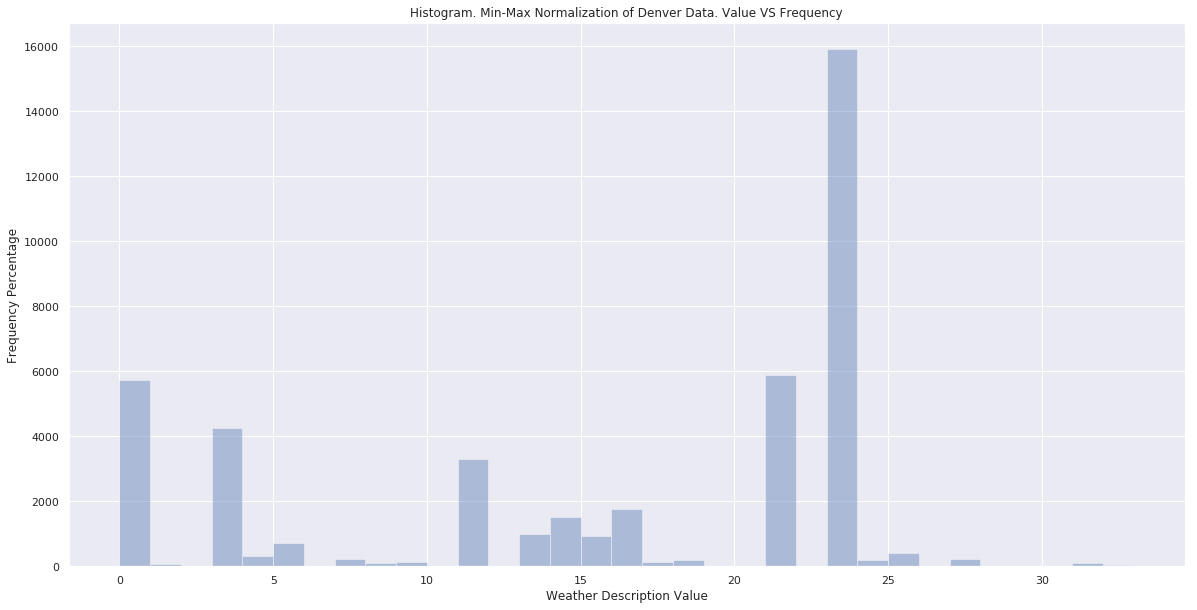

In [12]:
f, ax = plt.subplots(figsize=(20, 10))
plt.xlabel("Weather Description Value")
plt.ylabel("Frequency Percentage")
plt.title("Histogram. Min-Max Normalization of Denver Data. Value VS Frequency")
sns.distplot(y_df, ax=ax, kde=False)
# Clearly the data is very imbalanced. Not good....

# Split Data

In [108]:
x_train, x_test, y_train, y_test = train_test_split(normalized_X_df, y_df, test_size=0.2)

In [109]:
# Input Training Data for Model
x_train.head()

,humidity_Denver,pressure_Denver,temperature_Denver,wind_direction_Denver,wind_speed_Denver
33701,0.252632,0.062284,0.702540,0.911111,0.090909
32912,0.221053,0.775087,0.736907,0.033333,0.045455
5428,0.873684,0.764706,0.624824,0.541667,0.045455
36813,0.368421,0.757785,0.403232,0.000000,0.045455
31564,0.063158,0.764706,0.877163,0.083333,0.090909


In [110]:
# Output Training Data for Model
pd.DataFrame(y_train).head()

,0
0,23
1,23
2,0
3,23
4,0
